In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sin(y1,y2,n,l1,l2, limx=(0,1)): 
    plt.figure(figsize=(4,2))
    plt.plot(n,y1,'k',lw=2,label=l1)
    plt.plot(n,y2,'r',lw=2,label=l2)
    plt.xlim(limx)
    plt.ylim((-1,1))
    plt.grid()    
    plt.legend()

N = 256
n = np.linspace(0,1,N)
f0 = 1 
f1 = 4 

# fréquence différentes
y1 = np.sin(n*2*np.pi*f0)
y2 = np.sin(n*2*np.pi*f1) 
plot_sin(y1,y2,n,f0,f1)

# amplitudes différentes
y1 = np.sin(n*2*np.pi*f0)
y2 = .5*np.sin(n*2*np.pi*f0) 
plot_sin(y1,y2,n,1,.5)

# phases différentes
y1 = np.sin(n*2*np.pi*f1)
y2 = np.sin(n*2*np.pi*f1 + 2*np.pi*180/360) 
plot_sin(y1,y2,n,0,"180°")




In [ ]:
# importance de la phase 

# phases différentes
y1 = np.sin(n*2*np.pi*f1/2)
y2 = np.sin(n*2*np.pi*f1/2 + 2*np.pi*180/360) 
l1 = "0°"
l2 = "180°"

plt.figure(figsize=(4,2))
plt.plot(n,y1,'k',lw=2,label=l1)
plt.title(r"$s_1$")
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()    
plt.legend()

plt.figure(figsize=(4,2))
plt.plot(n,y2,'r',lw=2,label=l2)
plt.title(r"$s_2$")
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()    
plt.legend()

plt.figure(figsize=(4,2))
plt.plot(n,y1,'k',alpha = .25, lw=2,label=l1)
plt.plot(n,y2,'r',alpha = .25,lw=2,label=l2)
plt.plot(n,y1+y2,'b',lw=2,label=r"$s_1+s_2$")
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()    
plt.legend()

In [ ]:
# importance fréquence d'échantillonnage
f = 4
n = np.arange(N)*1.0

# Fs différents
Fs  = [256,9,5]
tex = ["signal", "bonne Fs", "mauvaise Fs"] 
plt.figure(figsize=(8,2))
for ind in range(3):
    y = np.sin((n/Fs[ind])*2*np.pi*f)
    plt.plot(n/Fs[ind],y,lw=2,label=tex[ind])
    if ind > 0:
        plt.plot(n/Fs[ind],y,"o",label=tex[ind])
    plt.xlim((0,1))
    plt.ylim((-1,1))
    plt.grid()    
    plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))    

In [ ]:
# Spectre de puissance et de phase 
Fs = 200
N = 1000
n = np.arange(N) 
f1 = 10/Fs

# phases différentes
y1 = np.cos(n*2*np.pi*f1)
y2 = np.cos(n*2*np.pi*f1 + 2*np.pi*90/360) 
plot_sin(y1,y2,n/Fs,0,"90°",(0,.5))

Nfft = N
TF1 = np.fft.fft(y1,Nfft)/N
TF2 = np.fft.fft(y2,Nfft)/N
freq = np.arange(Nfft)*Fs/Nfft

plt.figure(figsize=(4,2))
plt.plot(freq,np.abs(TF1)**2 ,'k',lw=2,label="signal sans phase")
plt.plot(freq,np.abs(TF2)**2 ,':r',lw=2,label="signal avec phase")

plt.title('Spectre de puissance')
plt.xlim((0,Fs//2))
plt.legend()
plt.grid()

plt.figure(figsize=(4,2))
plt.plot(freq,  np.angle( np.fft.fftshift(TF1) ) , 'k', lw=2, label="signal sans phase")
plt.plot(freq,  np.angle( np.fft.fftshift(TF2) ), ':r', lw=2, label="signal avec phase")
plt.title('Spectre de phase')
plt.xlim((0,Fs//2))
plt.legend()
plt.grid()

print( np.mean(np.angle(TF1) ) )
print( np.mean(np.angle(TF2) ) )



In [ ]:
# harmoniques 

Fs = 512
N = 1024
n = np.arange(N) 
t = n/Fs
f1 = 8

# phases différentes
y = 0 
plt.figure(figsize=(12,2))
a = np.random.rand(10)
a[0] = 1
a /=a.sum()
for m in range(10):
    yn = a[m]*np.cos( (m+1)*t*2*np.pi*f1 + 2*np.pi*np.random.rand()) 
    y+=yn
    plt.plot(n/Fs, yn, lw=2, alpha=.25)

plt.plot(t, y, lw=2)    
plt.xlim((0,2))
plt.ylim((-1,1))
plt.grid()    
    
TF1 = np.fft.fft(y,Nfft)/N    
freq = np.arange(Nfft)*Fs/Nfft

plt.figure(figsize=(4,2))
plt.plot(freq,  np.abs(TF1)**2 , 'k', lw=2)
plt.title('Spectre de puissance')
plt.xlim((0,Fs//2))
plt.grid()

In [ ]:
np.round((np.abs(TF1)**2)[:10],7)*1000000

In [ ]:
a = np.random.rand(10)
a[0] = 1
a /=a.sum()

phi = np.random.rand(10)

In [ ]:
Fs = 512
N = 512 # 256 #128
n = np.arange(N) 
t = n/Fs
f1 = 8

# phases différentes
y = 0 
plt.figure(figsize=(12,2))

for m in range(10):
    yn = a[m]*np.cos( (m+1)*t*2*np.pi*f1 + 2*np.pi*phi[m]) 
    y+=yn
    plt.plot(n/Fs, yn, lw=2, alpha=.25)

plt.plot(t, y, lw=2)    
plt.xlim((0,2))
plt.ylim((-1,1))
plt.grid()    
    
TF1 = np.fft.fft(y,N)/N    
freq = np.arange(N)*Fs/N

plt.figure(figsize=(4,2))
plt.plot(freq,  np.abs(TF1)**2 , 'k', lw=2)
plt.title('Spectre de puissance')
plt.xlim((0,Fs//2))
plt.grid()

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def porte(t, a, b):
    out = np.where((t >= a) & (t <= b), 1, 0)
    out = out/sum(out)
    return out

def convolution(x, h):
    return np.real(np.fft.fftshift(np.fft.ifft(np.fft.fft(x)*np.fft.fft(h))))

# Paramètres
duration = 10
sample_rate = 1000
t = np.linspace(-duration//2, duration//2, int(sample_rate * duration), endpoint=False)

# Création d'une fonction porte
port_a, port_b = -1, 1
x = porte(t, port_a, port_b)


(-5.0, 4.9990000000000006)

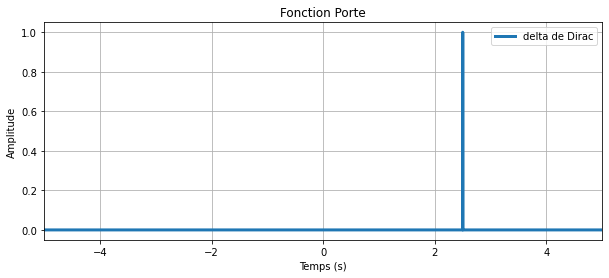

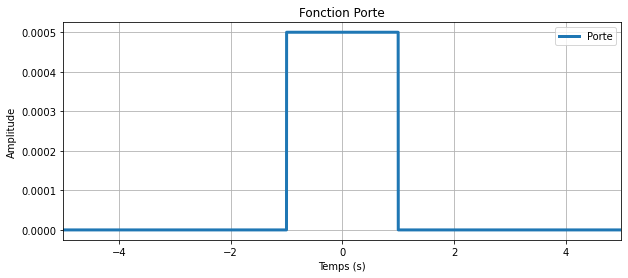

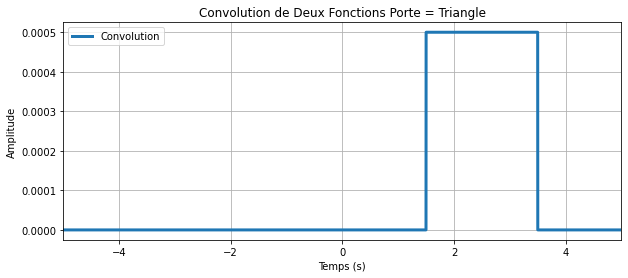

In [62]:
delta = np.zeros(len(t))
delta[int(len(t)*3/4)] = 1 


# Affichage de la fonction delta
plt.figure(figsize=(10, 4))
plt.plot(t, delta, label='delta de Dirac', lw=3)
plt.title('Fonction Porte')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

# Affichage de la fonction porte
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Porte', lw=3)
plt.title('Fonction Porte')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

# Calcul de la convolution
conv_result = convolution(x, delta)

# Affichage du résultat de la convolution
plt.figure(figsize=(10, 4))
plt.plot(t, conv_result, label='Convolution', lw=3)
plt.title('Convolution de Deux Fonctions Porte = Triangle')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

In [ ]:

# Affichage de la fonction porte
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Porte', lw=3)
plt.title('Fonction Porte')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

# Calcul de la convolution
conv_result = convolution(x, x)

# Affichage du résultat de la convolution
plt.figure(figsize=(10, 4))
plt.plot(t, conv_result, label='Convolution', lw=3)
plt.title('Convolution de Deux Fonctions Porte = Triangle')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

# Calcul de la convolution
conv_result = convolution(x, conv_result )

# Affichage du résultat de la convolution
plt.figure(figsize=(10, 4))
plt.plot(t, conv_result, label='Convolution', lw=3)
plt.title('Convolution des fonctions Porte et Triangle')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

# Calcul de la convolution
conv_result = convolution(x, conv_result )

# Affichage du résultat de la convolution
plt.figure(figsize=(10, 4))
plt.plot(t, conv_result, label='Convolution', lw=3)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t[0],t[-1]))

C:\Users\anton\AppData\Local\Temp\ipykernel_19368\887985785.py:4: RuntimeWarning: invalid value encountered in divide
  sinc = np.sin(t2)/t2


(-50.0, 49.99000000000001)

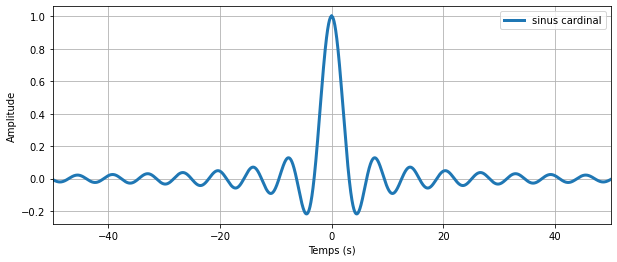

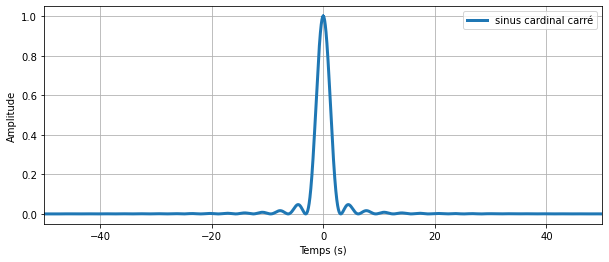

In [66]:
# sinus cardinal

t2 = 10*t
sinc = np.sin(t2)/t2 

plt.figure(figsize=(10, 4))
plt.plot(t2, sinc, label='sinus cardinal', lw=3)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t2[0],t2[-1]))

plt.figure(figsize=(10, 4))
plt.plot(t2, sinc**2, label='sinus cardinal carré', lw=3)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.xlim((t2[0],t2[-1]))

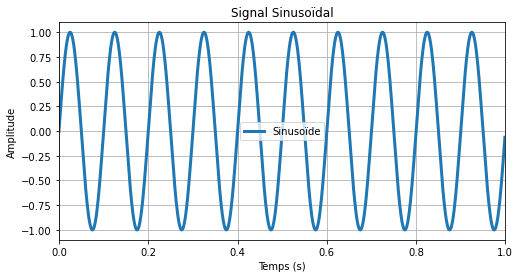

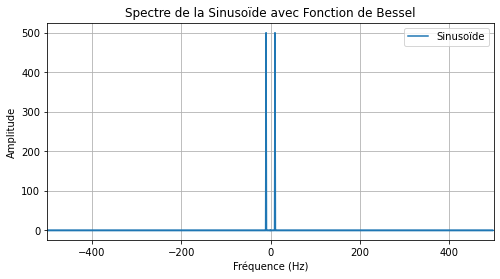

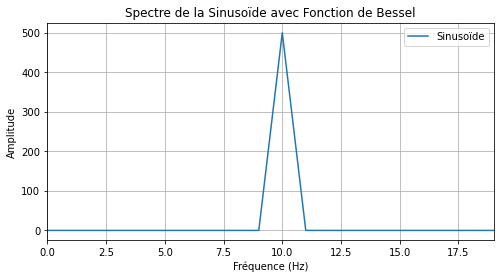

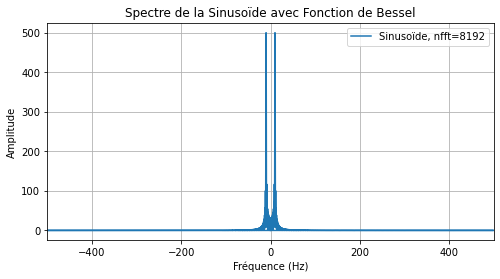

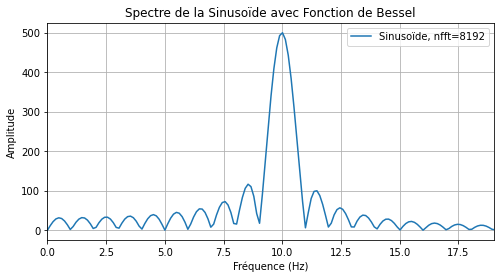

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn  # Fonction de Bessel de première espèce

# Paramètres
duration = 1.0          # Durée du signal en secondes
sample_rate = 1000       # Fréquence d'échantillonnage en Hz
frequency = 10            # Fréquence de la sinusoïde en Hz
order = 2                # Ordre de la fonction de Bessel

# Génération du signal sinusoïdal
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
sinusoidal_signal = np.sin(2 * np.pi * frequency * t)

# Génération de la fonction de Bessel
bessel_signal = jn(order, 2 * np.pi * frequency * t)

# Calcul des spectres
fft_sinusoidal = np.fft.fft(sinusoidal_signal)
freq_sinusoidal = np.fft.fftfreq(len(fft_sinusoidal), 1 / sample_rate)

# Affichage des graphiques


# Plot 1 : Sinusoïde
plt.figure(figsize=(8, 4))
plt.plot(t, sinusoidal_signal,lw=3, label='Sinusoïde')
plt.title('Signal Sinusoïdal')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim((0,1))
plt.legend()

# Plot 2 : Spectre de Sinusoïde avec Fonction de Bessel
plt.figure(figsize=(8, 4))
plt.plot(freq_sinusoidal, np.abs(fft_sinusoidal), label='Sinusoïde')
plt.title('Spectre de la Sinusoïde')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim((-sample_rate/2,sample_rate/2))
plt.legend()

# zoom 
ind = frequency + np.arange(-10,10)
plt.figure(figsize=(8, 4))
plt.plot(freq_sinusoidal[ind], np.abs(fft_sinusoidal[ind]), label='Sinusoïde')
plt.title('Spectre de la Sinusoïde')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim((ind[0],ind[-1]))
plt.legend()

# Calcul des spectres
nfft = 8192
fft_sinusoidal = np.fft.fft(sinusoidal_signal,nfft)
freq_sinusoidal = np.fft.fftfreq(len(fft_sinusoidal), 1 / sample_rate)

# Plot 2 : Spectre de Sinusoïde avec Fonction de Bessel
plt.figure(figsize=(8, 4))
plt.plot(freq_sinusoidal, np.abs(fft_sinusoidal), label='Sinusoïde, nfft={}'.format(nfft))
plt.title('Spectre de la Sinusoïde')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim((-sample_rate/2,sample_rate/2))
plt.legend()

# zoom 

ind2 = int(frequency*nfft/sample_rate) + np.arange(-100,100)
plt.figure(figsize=(8, 4))
plt.plot(freq_sinusoidal[ind2], np.abs(fft_sinusoidal[ind2]), label='Sinusoïde, nfft={}'.format(nfft))
plt.title('Spectre de la Sinusoïde')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.xlim((ind[0],ind[-1]))
plt.legend()


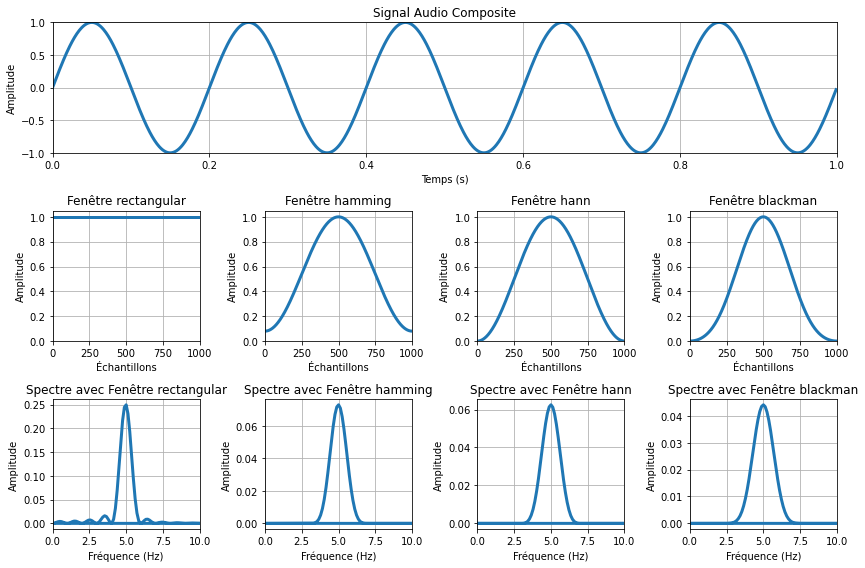

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window, spectrogram

# Paramètres
duration = 1.0  # Durée totale du signal en secondes
sample_rate = 1000  # Fréquence d'échantillonnage en Hz
frequencies = [5]  # Fréquences des signaux dans les fenêtres
nfft = 4096*2
# Générer un signal composé de plusieurs sinus à différentes fréquences
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
signal = np.sum([np.sin(2 * np.pi * f * t) for f in frequencies], axis=0)

# Fenêtres temporelles
window_types = ['rectangular', 'hamming', 'hann', 'blackman']
windows = [get_window(w, len(t)) for w in window_types]

# Calcul des spectres pour chaque fenêtre
spectra = [np.abs(np.fft.fft(signal * w,nfft)/len(t))**2 for w in windows]

# Affichage des résultats
plt.figure(figsize=(12, 8))

# Plot du signal audio
plt.subplot(3, 1, 1)
plt.plot(t, signal,lw=3)
plt.title('Signal Audio Composite')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.xlim((0,1))
plt.ylim((-1,1))
plt.grid()
# Plot des différentes fenêtres temporelles
for i, window_type in enumerate(window_types):
    plt.subplot(3, 4, i+5)
    plt.plot(windows[i],lw=3)
    plt.title(f'Fenêtre {window_type}')
    plt.xlabel('Échantillons')
    plt.ylabel('Amplitude')
    plt.xlim((0,1000))
    plt.ylim((0,1.05))
    plt.grid()

# Plot des spectres pour chaque fenêtre
for i, window_type in enumerate(window_types):
    plt.subplot(3, 4, i+9)
    plt.plot(np.fft.fftfreq(nfft, 1/sample_rate), spectra[i],lw=3)
    plt.title(f'Spectre avec Fenêtre {window_type}')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim((0,10))
    plt.grid()
plt.tight_layout()
plt.show()
